In [1]:
import torch
import torch as nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu118'

#DATA (preparing and loading)
*excel
*images
*video
*Audio
*text
*DNA

Machine learning is a game of two parts:

#linear reggression to make straing line with known parameters

# equation of linear reggression
# x = yw+b


In [2]:
#create known parameters
weight = 0.7
bias = 0.3
#create
start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X),len(y)

(50, 50)

#splitting data into traing and test set

In [4]:
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_lables = y_train,
                     test_data= X_test,
                     test_lables=y_test,
                     predictions= None):
  """Plots training data , test data and compare predictions"""
  plt.figure(figsize = (10,7))
  #plot traing data in blue
  plt.scatter(train_data,train_lables,c = "b",s = 4,label = "training data")
  #plot test data in green
  plt.scatter(test_data,test_lables,c = "g",s = 4,label = "Testing data")
  #are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c = "r",s=4,label="predictrions")
  #show the legend
  plt.legend(prop={"size":14})

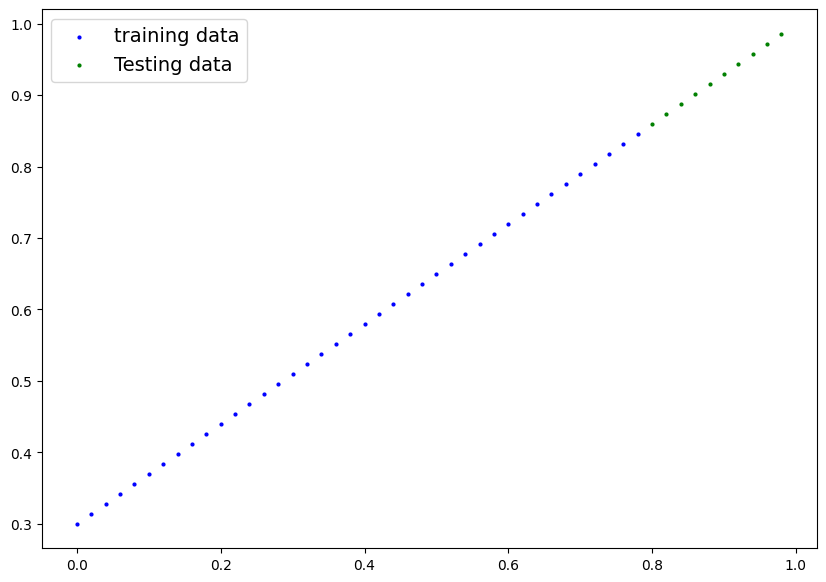

In [6]:
plot_predictions();

#Traing the model

First pytorch model- linear regg model

In [10]:
# Create a Linear Regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

# create random seed for same result everytime - 42

In [11]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
parameters = list(model_0.parameters())
print(parameters)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


### making predictions using torch.inference_mode()
To check our models predictive power lets see how well it predicts X_test and y_test

In [12]:
#make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

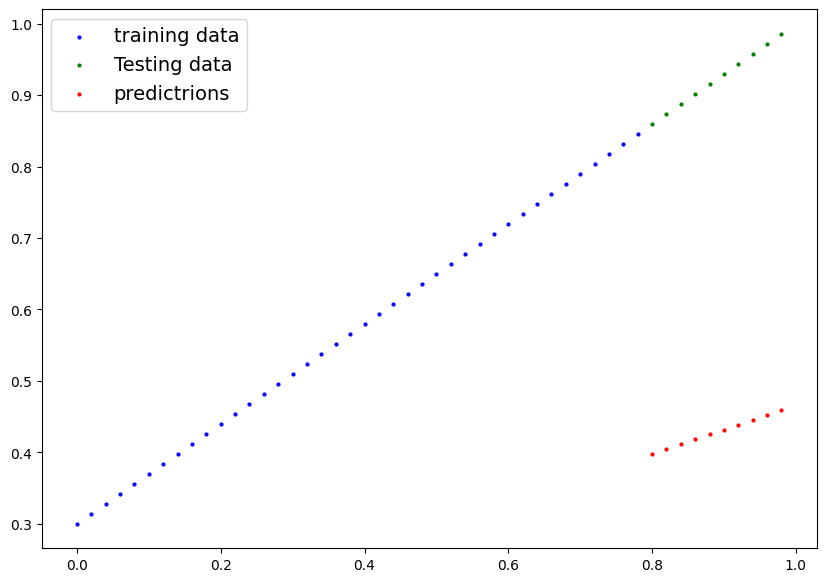

In [14]:
plot_predictions(predictions=y_preds)

###Train a Model